In [164]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from distort_image_ import distort_image

path ="lab2_2_data"

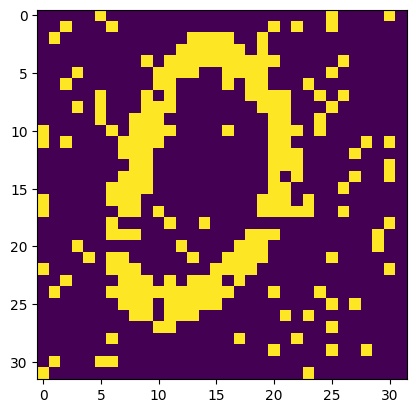

In [21]:
im=[]
for i in range(3):    
    im.append( pd.read_csv(path + f"/p{i}.csv", header=None))
    im[i]=np.array(im[i])
    im[i]=im[i].reshape(32,32).T



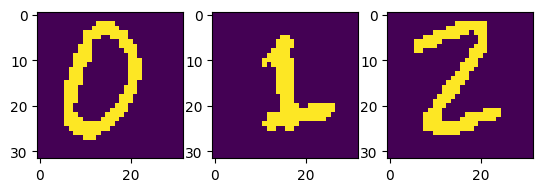

In [22]:
fig, axs = plt.subplots(1,3)

for i, ax in enumerate(axs):
    ax.imshow(im[i])

In [111]:
p1 = np.array([-1, -1, +1, -1, +1, -1, -1, +1]) # --+-+--+
p2 = np.array([-1, -1, -1, -1, -1, +1, -1, -1])
p3 = np.array([-1, +1, +1, -1, -1, +1, -1, +1])
p =[p1,p2,p3]
np.corrcoef(p)

array([[ 1.        , -0.29277002,  0.25819889],
       [-0.29277002,  1.        ,  0.37796447],
       [ 0.25819889,  0.37796447,  1.        ]])

In [106]:
# weigths matrix
W = np.zeros((8,8))
for i in range(3):
    W += np.outer(p[i], p[i])

W = W- 3*np.eye(8)

W/=3
W

array([[ 0.        ,  0.33333333, -0.33333333,  1.        ,  0.33333333,
        -0.33333333,  1.        , -0.33333333],
       [ 0.33333333,  0.        ,  0.33333333,  0.33333333, -0.33333333,
         0.33333333,  0.33333333,  0.33333333],
       [-0.33333333,  0.33333333,  0.        , -0.33333333,  0.33333333,
        -0.33333333, -0.33333333,  1.        ],
       [ 1.        ,  0.33333333, -0.33333333,  0.        ,  0.33333333,
        -0.33333333,  1.        , -0.33333333],
       [ 0.33333333, -0.33333333,  0.33333333,  0.33333333,  0.        ,
        -1.        ,  0.33333333,  0.33333333],
       [-0.33333333,  0.33333333, -0.33333333, -0.33333333, -1.        ,
         0.        , -0.33333333, -0.33333333],
       [ 1.        ,  0.33333333, -0.33333333,  1.        ,  0.33333333,
        -0.33333333,  0.        , -0.33333333],
       [-0.33333333,  0.33333333,  1.        , -0.33333333,  0.33333333,
        -0.33333333, -0.33333333,  0.        ]])

In [145]:
x1 = np.array([+1, -1, +1, -1, +1, -1, -1, +1])
x2 = np.array([+1, +1, -1, -1, -1, +1, -1, -1])
x3 = np.array([+1, +1, +1, -1, +1, +1, -1, +1])
print('p1:', p1, 'x1: ', x1)
print('p2: ', p2, 'x2: ', x2)
print('p3: ', p3, 'x3: ', x3)



p1: [-1 -1  1 -1  1 -1 -1  1] x1:  [ 1 -1  1 -1  1 -1 -1  1]
p2:  [-1 -1 -1 -1 -1  1 -1 -1] x2:  [ 1  1 -1 -1 -1  1 -1 -1]
p3:  [-1  1  1 -1 -1  1 -1  1] x3:  [ 1  1  1 -1  1  1 -1  1]


In [116]:
I =np.random.random((8,1))
def retrieval(x): 
    x_new = x
    for i in range(100):
        x_old = x_new
        x_new = np.sign(W @ x )
        if np.all(x_old == x_new):
            break
    
    if i==99:
        print('not converged')
    else:
        print(f'converged in {i+1} its')
    print(x_new)
    return x_new
    


In [117]:
r1 = retrieval(x1)
print(p1.astype(float))
r2 = retrieval(x2)
print(p2.astype(float))
r3 = retrieval(x3)
print(p3.astype(float))

converged in 2 its
[-1. -1.  1. -1.  1. -1. -1.  1.]
[-1. -1.  1. -1.  1. -1. -1.  1.]
converged in 2 its
[-1. -1. -1.  1. -1.  1.  1. -1.]
[-1. -1. -1. -1. -1.  1. -1. -1.]
converged in 2 its
[-1.  1.  1. -1. -1. -1. -1.  1.]
[-1.  1.  1. -1. -1.  1. -1.  1.]


In [122]:
print(np.corrcoef(r1, p1))
print(np.corrcoef(x1, p1))
print(np.corrcoef(r2, p2))
print(np.corrcoef(x2, p2))
print(np.corrcoef(r3, p3))
print(np.corrcoef(x3, p3))


[[1. 1.]
 [1. 1.]]
[[1.         0.77459667]
 [0.77459667 1.        ]]
[[1.         0.48795004]
 [0.48795004 1.        ]]
[[1.         0.48795004]
 [0.48795004 1.        ]]
[[1.         0.77459667]
 [0.77459667 1.        ]]
[[1.         0.57735027]
 [0.57735027 1.        ]]


In [426]:
class HopfieldNetwork():
    def __init__(self) -> None:
        pass

    def _training(self, data: np.array):
        n_examples, dim = data.shape
        self.W = np.zeros((dim,dim ))
        for i in range(n_examples):
            self.W += np.outer(data[i], data[i])

        self.W = self.W- n_examples *np.eye(dim)

        self.W/= dim
        self.n_examples = n_examples
        self.dim = dim
        
    
    def retrieval(self, x, data, max_steps, bias =0.6):
        self.energy = []
        self._training(data)
        
        x_new = x.copy()
        for i in range(max_steps):
     
            neurons = np.random.permutation(self.dim)
            x_old = x_new.copy()
            

            for neuron in neurons: 
                new_value = np.dot(self.W[neuron, :], x_new)+ bias
                
                x_new[neuron] = np.sign(new_value)
                self.energy.append(np.sum( self.W * np.outer(x_new, x_new) ))
   
            if np.all(x_old == x_new): # check if after a change to every component, the vector is the same. 
                print(f'converged in {i+1} steps')
                break
    
        return x_new
    

In [427]:
images =np.array(im)
images = images.reshape(3,-1)

converged in 2 steps


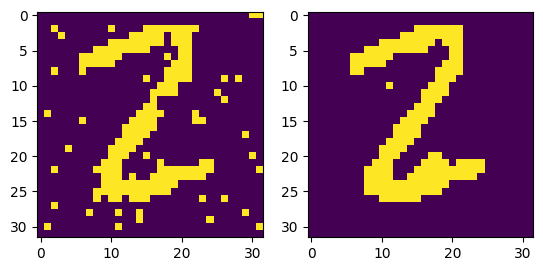

In [439]:
dist_img =distort_image(im[2], 0.05)
fig, axes =plt.subplots(1,2)
axes[0].imshow(dist_img)
dist_img = dist_img.reshape(-1,1)
hopfield_net= HopfieldNetwork()

retrieved = hopfield_net.retrieval(dist_img, images, 100, bias =0.7)

axes[1].imshow(retrieved.reshape(32,32))


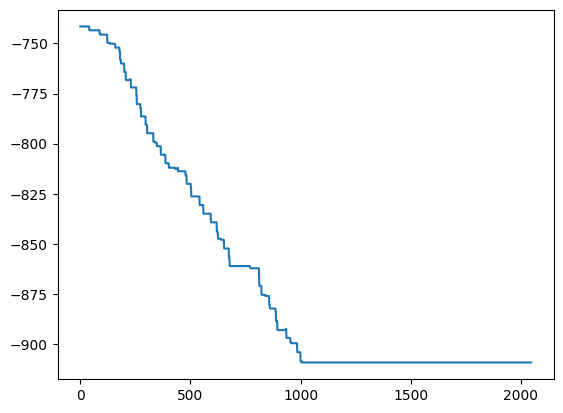

In [440]:
plt.plot( (-1./2) * np.array(hopfield_net.energy) )

array([3.09593047e-293, 3.09593047e-293, 3.09593047e-293, ...,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000])

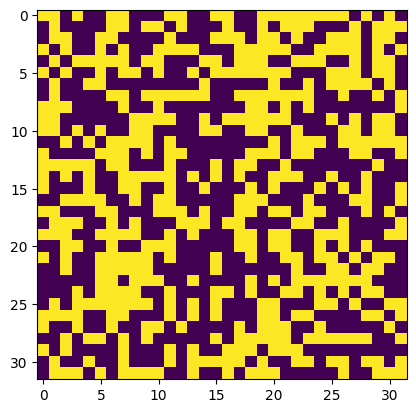

In [374]:
retrieved =retrieved.reshape(32,32)
plt.imshow(retrieved)

array([1., 0.])